In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import pandas as pd
import xarray as xr

from scipy import signal
from scipy import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [17]:
sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
import reanalysis_recons_utils as rrutils

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/')
import commonera_utils as ce_utils 

Loading information from datasets.yml
Loading information from grid_def.yml
Loading information from datasets.yml
Loading information from grid_def.yml


In [3]:
import importlib
importlib.reload(ce_utils)

<module 'commonera_utils' from '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/commonera_utils.py'>

In [4]:
def load_recon_allit(output_dir,filename,niter,prox_loc=True, tas=False, regions=False):

    for it, itt in enumerate(niter):
        output_file = filename[:-5]+str(itt)+'.pkl'

        if prox_loc is True: 
            if tas is True: 
                if regions is True: 
                    [sic_lalo, tas_lalo, sic_ens_var,nobs, sia_ens, sie_ens, recon_years, 
                     Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, 
                     cutoff_count_pos,cutoff_count_neg, gmtas_ens, nhmtas_ens, amtas_ens, 
                     regional_sie,regional_sia] = load_recon(output_dir+output_file, 
                                                             tas=tas,regions=regions, prox_loc=prox_loc)
                else: 
                    [sic_lalo, tas_lalo, sic_ens_var,nobs, sia_ens, sie_ens, recon_years, 
                     Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, 
                     cutoff_count_pos,cutoff_count_neg, gmtas_ens, 
                     nhmtas_ens, amtas_ens] = load_recon(output_dir+output_file, 
                                                         tas=tas,regions=regions, prox_loc=prox_loc)
            else: 
                if regions is True: 
                    [sic_lalo, tas_lalo, sic_ens_var, 
                     nobs, sia_ens, sie_ens, recon_years, 
                     Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc,
                     regional_sie, regional_sia] = load_recon(output_dir+output_file,
                                                              tas=tas,regions=regions, prox_loc=prox_loc)
                else: 
                    [sic_lalo, tas_lalo, sic_ens_var, 
                     nobs, sia_ens, sie_ens, recon_years, 
                     Ye_assim, Ye_assim_coords, Xb_inflate, 
                     proxy_assim_loc] = load_recon(output_dir+output_file,
                                                   tas=tas,regions=regions, prox_loc=prox_loc)          
        else: 
            if tas is True: 
                if regions is True: 
                    [sic_lalo, tas_lalo, sic_ens_var,nobs, sia_ens, sie_ens, recon_years, 
                     Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, 
                     cutoff_count_pos,cutoff_count_neg, gmtas_ens, nhmtas_ens, amtas_ens, 
                     regional_sie, regional_sia] = load_recon(output_dir+output_file, 
                                                              tas=tas,regions=regions, prox_loc=prox_loc)
                else: 
                    [sic_lalo, tas_lalo, sic_ens_var,nobs, sia_ens, sie_ens, recon_years, 
                     Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, 
                     cutoff_count_pos,cutoff_count_neg, gmtas_ens, 
                     nhmtas_ens, amtas_ens] = load_recon(output_dir+output_file,
                                                         tas=tas,regions=regions, prox_loc=prox_loc)
            else: 
                if regions is True: 
                    [sic_lalo, tas_lalo, sic_ens_var, 
                     nobs, sia_ens, sie_ens, recon_years, 
                     Ye_assim, Ye_assim_coords, Xb_inflate,
                     regional_sie, regional_sia] = load_recon(output_dir+output_file,
                                                             tas=tas,regions=regions, prox_loc=prox_loc)
                else: 
                    [sic_lalo, tas_lalo, sic_ens_var, 
                     nobs, sia_ens, sie_ens, recon_years, 
                     Ye_assim, Ye_assim_coords, Xb_inflate] = load_recon(output_dir+output_file,
                                                                         tas=tas,regions=regions, 
                                                                         prox_loc=prox_loc)

        if it is 0: 
            sic_lalo_allit = np.zeros((sic_lalo.shape[0],sic_lalo.shape[1],sic_lalo.shape[2],len(niter)))
            tas_lalo_allit = np.zeros((tas_lalo.shape[0],tas_lalo.shape[1],tas_lalo.shape[2],len(niter)))
            sic_ens_var_allit = np.zeros(len(niter))
            nobs_allit = np.zeros((nobs.shape[0],len(niter)))
            sia_ens_allit = np.zeros((sia_ens.shape[0],sia_ens.shape[1],len(niter)))
            sie_ens_allit = np.zeros((sie_ens.shape[0],sie_ens.shape[1],len(niter)))
            Ye_assim_allit = np.zeros((Ye_assim.shape[0],Ye_assim.shape[1],len(niter)))
            Ye_assim_coords_allit = np.zeros((Ye_assim_coords.shape[0],Ye_assim_coords.shape[1],len(niter)))
            Xb_inflate_allit = np.zeros((Xb_inflate.shape[0],Xb_inflate.shape[1],len(niter)))
            if prox_loc is True: 
                proxy_assim_loc_allit = {}
                
                if tas is True: 
                    cutoff_count_pos_allit = np.zeros(len(niter))
                    cutoff_count_neg_allit = np.zeros(len(niter))
                    gmtas_ens_allit = np.zeros((gmtas_ens.shape[0],gmtas_ens.shape[1],len(niter)))
                    nhmtas_ens_allit = np.zeros((nhmtas_ens.shape[0],nhmtas_ens.shape[1],len(niter)))
                    amtas_ens_allit = np.zeros((amtas_ens.shape[0],amtas_ens.shape[1],len(niter)))
                    
                    if regions is True: 
                        regional_sie_allit = {}
                        regional_sia_allit = {}
            else: 
                if tas is True: 
                    cutoff_count_pos_allit = np.zeros(len(niter))
                    cutoff_count_neg_allit = np.zeros(len(niter))
                    gmtas_ens_allit = np.zeros((gmtas_ens.shape[0],gmtas_ens.shape[1],len(niter)))
                    nhmtas_ens_allit = np.zeros((nhmtas_ens.shape[0],nhmtas_ens.shape[1],len(niter)))
                    amtas_ens_allit = np.zeros((amtas_ens.shape[0],amtas_ens.shape[1],len(niter)))
                    
                    if regions is True: 
                        regional_sie_allit = {}
                        regional_sia_allit = {}

        sic_lalo_allit[:,:,:,it] = sic_lalo
        tas_lalo_allit[:,:,:,it] = tas_lalo
        sic_ens_var_allit[it] = len(niter)
        nobs_allit[:,it] = nobs
        sia_ens_allit[:,:,it] = sia_ens
        sie_ens_allit[:,:,it] = sie_ens
        Ye_assim_allit[:,:,it] = Ye_assim
        Ye_assim_coords_allit[:,:,it] = Ye_assim_coords
        Xb_inflate_allit[:,:,it] = Xb_inflate
        if prox_loc is True: 
            proxy_assim_loc_allit['iter '+str(it)] = proxy_assim_loc
            
            if tas is True: 
                cutoff_count_pos_allit[it] = cutoff_count_pos
                cutoff_count_neg_allit[it] = cutoff_count_neg
                gmtas_ens_allit[:,:,it] = gmtas_ens
                nhmtas_ens_allit[:,:,it] = nhmtas_ens
                amtas_ens_allit[:,:,it] = amtas_ens
                
                if regions is True: 
                    regional_sie_allit[it] = regional_sie
                    regional_sia_allit[it] = regional_sia
        else: 
            if tas is True: 
                cutoff_count_pos_allit[it] = cutoff_count_pos
                cutoff_count_neg_allit[it] = cutoff_count_neg
                gmtas_ens_allit[:,:,it] = gmtas_ens
                nhmtas_ens_allit[:,:,it] = nhmtas_ens
                amtas_ens_allit[:,:,it] = amtas_ens
                
                if regions is True: 
                    regional_sie_allit[it] = regional_sie
                    regional_sia_allit[it] = regional_sia
        
    if prox_loc is True:
        if tas is True: 
            if regions is True: 
                return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                        sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                        Xb_inflate_allit,recon_years, proxy_assim_loc_allit, cutoff_count_pos_allit, 
                        cutoff_count_neg_allit, gmtas_ens_allit, nhmtas_ens_allit, amtas_ens_allit, 
                        regional_sie_allit, regional_sia_allit)
            else: 
                return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                        sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                        Xb_inflate_allit,recon_years, proxy_assim_loc_allit, cutoff_count_pos_allit, 
                        cutoff_count_neg_allit, gmtas_ens_allit, nhmtas_ens_allit, amtas_ens_allit)
        else: 
            if regions is True: 
                return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                        sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                        Xb_inflate_allit,recon_years, proxy_assim_loc_allit, regional_sie_allit, 
                        regional_sia_allit)
            else: 
                return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                        sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                        Xb_inflate_allit,recon_years, proxy_assim_loc_allit)
    else: 
        if tas is True: 
            if regions is True:
                return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                        sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                        Xb_inflate_allit,recon_years, proxy_assim_loc_allit, cutoff_count_pos_allit, 
                        cutoff_count_neg_allit, gmtas_ens_allit, nhmtas_ens_allit, amtas_ens_allit,
                        regional_sie_allit, regional_sia_allit)
            else:
                return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                        sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                        Xb_inflate_allit,recon_years, proxy_assim_loc_allit, cutoff_count_pos_allit, 
                        cutoff_count_neg_allit, gmtas_ens_allit, nhmtas_ens_allit, amtas_ens_allit)
        else: 
            if regions is True:
                return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                        sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                        Xb_inflate_allit,recon_years,regional_sie_allit, regional_sia_allit)
            else: 
                return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                        sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                        Xb_inflate_allit,recon_years)

In [5]:
def load_recon(LOC, prox_loc=True, tas=False, regions=False):
    recon = pickle.load(open(LOC,'rb'))
    
    sic_lalo = recon['sic_lalo']
    tas_lalo = recon['tas_lalo']
    sic_ens_var = recon['sic_ens_var']
    nobs = recon['nobs']
    sia_ens = recon['sia_ens']
    sie_ens = recon['sie_ens']
    recon_years = recon['recon_years']
    Ye_assim = recon['Ye_assim']
    Ye_assim_coords = recon['Ye_assim_coords']
    Xb_inflate = recon['Xb_inflate'] 
    
    
    if prox_loc is True: 
        proxy_assim_loc = recon['proxy_assim_loc']
        
        if tas is True: 
            cutoff_count_pos = recon['cutoff_count_pos']
            cutoff_count_neg = recon['cutoff_count_neg']
            gmtas_ens = recon['gmtas_ens']
            nhmtas_ens = recon['nhmtas_ens']
            amtas_ens = recon['amtas_ens']
            
            if regions is True: 
                regional_sie = recon['regional_sie']
                regional_sia = recon['regional_sia']
                
                return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                        Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, cutoff_count_pos,
                        cutoff_count_neg, gmtas_ens, nhmtas_ens, amtas_ens, regional_sie, regional_sia)
            
            else: 
                return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                        Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, cutoff_count_pos,
                        cutoff_count_neg, gmtas_ens, nhmtas_ens, amtas_ens)
            
        else: 
            return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                    Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc)
    else: 
        if tas is True: 
            cutoff_count_pos = recon['cutoff_count_pos']
            cutoff_count_neg = recon['cutoff_count_neg']
            gmtas_ens = recon['gmtas_ens']
            nhmtas_ens = recon['nhmtas_ens']
            amtas_ens = recon['amtas_ens']
            
            if regions is True: 
                regional_sie = recon['regional_sie']
                regional_sia = recon['regional_sia']
                
                return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                        Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, cutoff_count_pos,
                        cutoff_count_neg, gmtas_ens, nhmtas_ens, amtas_ens,regional_sie,regional_sia)
                
            else: 
                if regions is True: 
                    regional_sie = recon['regional_sie']
                    regional_sia = recon['regional_sia']
                    
                    return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                            Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, cutoff_count_pos,
                            cutoff_count_neg, gmtas_ens, nhmtas_ens, amtas_ens,regional_sie, regional_sia)
                else: 
                    return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                            Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc, cutoff_count_pos,
                            cutoff_count_neg, gmtas_ens, nhmtas_ens, amtas_ens)
        else: 
            if regions is True: 
                regional_sie = recon['regional_sie']
                regional_sia = recon['regional_sia']
                
                return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                        Ye_assim, Ye_assim_coords, Xb_inflate, regional_sie, regional_sia)
            
            else:      
                return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                        Ye_assim, Ye_assim_coords, Xb_inflate)

In [6]:
regions = ['Sea of Okhotsk','Bering Sea','Hudson Bay','St John','Baffin Bay',
           'East Greenland Sea','Barents Sea','Kara Sea','Laptev Sea','East Siberian Sea',
           'Chukchi Sea','Beaufort Sea','Canadian Archipelago','Central Arctic']

# Load Reconstructions: 

In [7]:
anom_start = 1979
anom_end = 2000

In [8]:
output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
#output_file_ccsm4 = 'sic_ccsm4_anrecon_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'
output_file_ccsm4 = 'sic_ccsm4_anrecon_revisions2_regions_testcount2_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'

niter = [0,1,7,8]

[sic_lalo_allit_ccsm4, tas_lalo_allit_ccsm4, sic_ens_var_allit_ccsm4, 
 nobs_allit_ccsm4, sia_ens_allit_ccsm4, sie_ens_allit_ccsm4, Ye_assim_allit_ccsm4, 
 Ye_assim_coords_allit_ccsm4, Xb_inflate_allit_ccsm4, recon_years, 
 proxy_assim_loc_allit_ccsm4, cutoff_count_pos_allit, cutoff_count_neg_allit, 
 gmtas_ens_allit, nhmtas_ens_allit, amtas_ens_allit, 
 regional_sie_all, regional_sia_all] = load_recon_allit(output_dir_ccsm4,output_file_ccsm4,niter, tas=True, regions=True)

In [9]:
regional_sie_allit = {}
regional_sia_allit = {}
regional_sie_allit_anom = {}
regional_sia_allit_anom = {}
inds = np.where((np.array(recon_years)>=anom_start)&(np.array(recon_years)<=anom_end))

for reg in regions:
    reg_hold_sie = np.zeros((2000,200*len(niter)))
    reg_hold_sia = np.zeros((2000,200*len(niter)))
    for it,itt in enumerate(niter):
        reg_hold_sie[:,it*200:it*200+200] = regional_sie_all[it]['reg_sie_anom'][reg]
        reg_hold_sia[:,it*200:it*200+200] = regional_sia_all[it]['reg_sia_anom'][reg]
        
    regional_sie_allit[reg] = np.nanmean(reg_hold_sie,axis=1)/1e6
    regional_sia_allit[reg] = np.nanmean(reg_hold_sia,axis=1)/1e6
    
    regional_sie_allit_anom[reg] = regional_sie_allit[reg] - np.nanmean(regional_sie_allit[reg][inds])
    regional_sia_allit_anom[reg] = regional_sia_allit[reg] - np.nanmean(regional_sia_allit[reg][inds])


# Load Walsh regional data: 

In [10]:
walsh_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/Walsh2016/walsh_comparison/'
walsh_file = 'Walsh_annual_regional_means_sia_sie_km2.npz'
walsh_all_file = 'Walsh_annual_all_regional_means_sia_sie_km2.npz'

walsh_ds = np.load(walsh_dir+walsh_file)

In [11]:
walsh_time = walsh_ds['Walsh_years']
walsh_ind = np.where((walsh_time>=anom_start)&(walsh_time<=anom_end))

walsh_greenland_sia = walsh_ds['Greenland_sea_sia_anmn'] - np.nanmean(walsh_ds['Greenland_sea_sia_anmn'][walsh_ind])
walsh_hudbay_sia = walsh_ds['Hudson_bay_sea_sia_anmn'] - np.nanmean(walsh_ds['Hudson_bay_sea_sia_anmn'][walsh_ind])
walsh_barents_sia = walsh_ds['Barents_sea_sia_anmn'] - np.nanmean(walsh_ds['Barents_sea_sia_anmn'][walsh_ind])
walsh_canarch_sia = walsh_ds['CanArch_sea_sia_anmn'] - np.nanmean(walsh_ds['CanArch_sea_sia_anmn'][walsh_ind])
walsh_chukchi_sia = walsh_ds['Chukchi_sea_sia_anmn'] - np.nanmean(walsh_ds['Chukchi_sea_sia_anmn'][walsh_ind])

walsh_greenland_sie = walsh_ds['Greenland_sea_sie_anmn'] - np.nanmean(walsh_ds['Greenland_sea_sie_anmn'][walsh_ind])
walsh_hudbay_sie = walsh_ds['Hudson_bay_sea_sie_anmn'] - np.nanmean(walsh_ds['Hudson_bay_sea_sie_anmn'][walsh_ind])
walsh_barents_sie = walsh_ds['Barents_sea_sie_anmn'] - np.nanmean(walsh_ds['Barents_sea_sie_anmn'][walsh_ind])
walsh_canarch_sie = walsh_ds['CanArch_sea_sie_anmn'] - np.nanmean(walsh_ds['CanArch_sea_sie_anmn'][walsh_ind])
walsh_chukchi_sie = walsh_ds['Chukchi_sea_sie_anmn'] - np.nanmean(walsh_ds['Chukchi_sea_sie_anmn'][walsh_ind])

In [12]:
walsh_all_ds = np.load(walsh_dir+walsh_all_file)
walsh_ind = np.where((walsh_time>=anom_start)&(walsh_time<=anom_end))

walsh_years = walsh_all_ds['Walsh_years']
walsh_regional_sia = {}
walsh_regional_sie = {}

walsh_regional_sia['Beaufort Sea'] = walsh_all_ds['Beaufort_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Beaufort_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Chukchi Sea'] = walsh_all_ds['Chukchi_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Chukchi_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['East Siberian Sea'] = walsh_all_ds['Siberian_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Siberian_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Laptev Sea'] = walsh_all_ds['Laptev_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Laptev_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Kara Sea'] = walsh_all_ds['Kara_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Kara_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Barents Sea'] = walsh_all_ds['Barents_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Barents_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['East Greenland Sea'] = walsh_all_ds['Greenland_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Greenland_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Baffin Bay'] = walsh_all_ds['Baffin_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Baffin_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Canadian Archipelago'] = walsh_all_ds['CanArch_sea_sia_anmn'] - np.nanmean(walsh_all_ds['CanArch_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Hudson Bay'] = walsh_all_ds['Hudson_bay_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Hudson_bay_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Central Arctic'] = walsh_all_ds['Centralarctic_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Centralarctic_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Baltic Sea'] = walsh_all_ds['Baltic_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Baltic_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Bering Sea'] = walsh_all_ds['Bering_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Bering_sea_sia_anmn'][walsh_ind])
walsh_regional_sia['Sea of Okhotsk'] = walsh_all_ds['Okhotsk_sea_sia_anmn'] - np.nanmean(walsh_all_ds['Okhotsk_sea_sia_anmn'][walsh_ind])

In [13]:
walsh_regional_sie['Beaufort Sea'] = walsh_all_ds['Beaufort_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Beaufort_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Chukchi Sea'] = walsh_all_ds['Chukchi_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Chukchi_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['East Siberian Sea'] = walsh_all_ds['Siberian_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Siberian_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Laptev Sea'] = walsh_all_ds['Laptev_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Laptev_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Kara Sea'] = walsh_all_ds['Kara_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Kara_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Barents Sea'] = walsh_all_ds['Barents_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Barents_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['East Greenland Sea'] = walsh_all_ds['Greenland_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Greenland_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Baffin Bay'] = walsh_all_ds['Baffin_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Baffin_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Canadian Archipelago'] = walsh_all_ds['CanArch_sea_sie_anmn'] - np.nanmean(walsh_all_ds['CanArch_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Hudson Bay'] = walsh_all_ds['Hudson_bay_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Hudson_bay_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Central Arctic'] = walsh_all_ds['Centralarctic_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Centralarctic_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Baltic Sea'] = walsh_all_ds['Baltic_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Baltic_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Bering Sea'] = walsh_all_ds['Bering_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Bering_sea_sie_anmn'][walsh_ind])
walsh_regional_sie['Sea of Okhotsk'] = walsh_all_ds['Okhotsk_sea_sie_anmn'] - np.nanmean(walsh_all_ds['Okhotsk_sea_sie_anmn'][walsh_ind])

In [15]:
regions_both = ['Sea of Okhotsk','Bering Sea','Hudson Bay','Baffin Bay',
                'East Greenland Sea','Barents Sea','Kara Sea','Laptev Sea','East Siberian Sea',
                'Chukchi Sea','Beaufort Sea','Canadian Archipelago','Central Arctic']

In [18]:
ce_walsh_ccsm4_allregions = {}
corr_walsh_ccsm4_allregions = {}

for reg in regions_both: 
    print('Working on '+reg+'...')
    [ce_walsh_ccsm4_allregions[reg],
     corr_walsh_ccsm4_allregions[reg],_,_] = rrutils.find_ce_corr(walsh_regional_sia[reg], 
                                                                   regional_sia_allit_anom[reg],
                                                                   np.array(recon_years),
                                                                   walsh_time,1850,1999)
    
    print('R^2 = '+str(np.round(corr_walsh_ccsm4_allregions[reg]**2,2)))
    print('CE = '+str(np.round(ce_walsh_ccsm4_allregions[reg],2))+'\n')

Working on Sea of Okhotsk...
R^2 = 0.01
CE = -0.58

Working on Bering Sea...
R^2 = 0.24
CE = -1.25

Working on Hudson Bay...
R^2 = 0.18
CE = -1.09

Working on Baffin Bay...
R^2 = 0.0
CE = -0.85

Working on East Greenland Sea...
R^2 = 0.01
CE = -0.44

Working on Barents Sea...
R^2 = 0.12
CE = -0.38

Working on Kara Sea...
R^2 = 0.12
CE = -1.09

Working on Laptev Sea...
R^2 = 0.07
CE = -0.27

Working on East Siberian Sea...
R^2 = 0.06
CE = -0.32

Working on Chukchi Sea...
R^2 = 0.27
CE = -1.43

Working on Beaufort Sea...
R^2 = 0.1
CE = -1.39

Working on Canadian Archipelago...
R^2 = 0.01
CE = -1.09

Working on Central Arctic...
R^2 = 0.01
CE = -0.61



In [19]:
regional_sia_allit_anom[reg], regional_sia_allit[reg]

(array([ 1.68583514,  1.52290467,  1.22554345, ..., -0.00564891,
        -1.29333573,  0.27345905]),
 array([291.46625777, 291.3033273 , 291.00596608, ..., 289.77477372,
        288.4870869 , 290.05388168]))

In [20]:
Wn2 = 1.0/15
nf2 = 7
b2,a2 = signal.butter(nf2,Wn2,btype='lowpass')
w2, h2 = signal.freqs(b2, a2)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


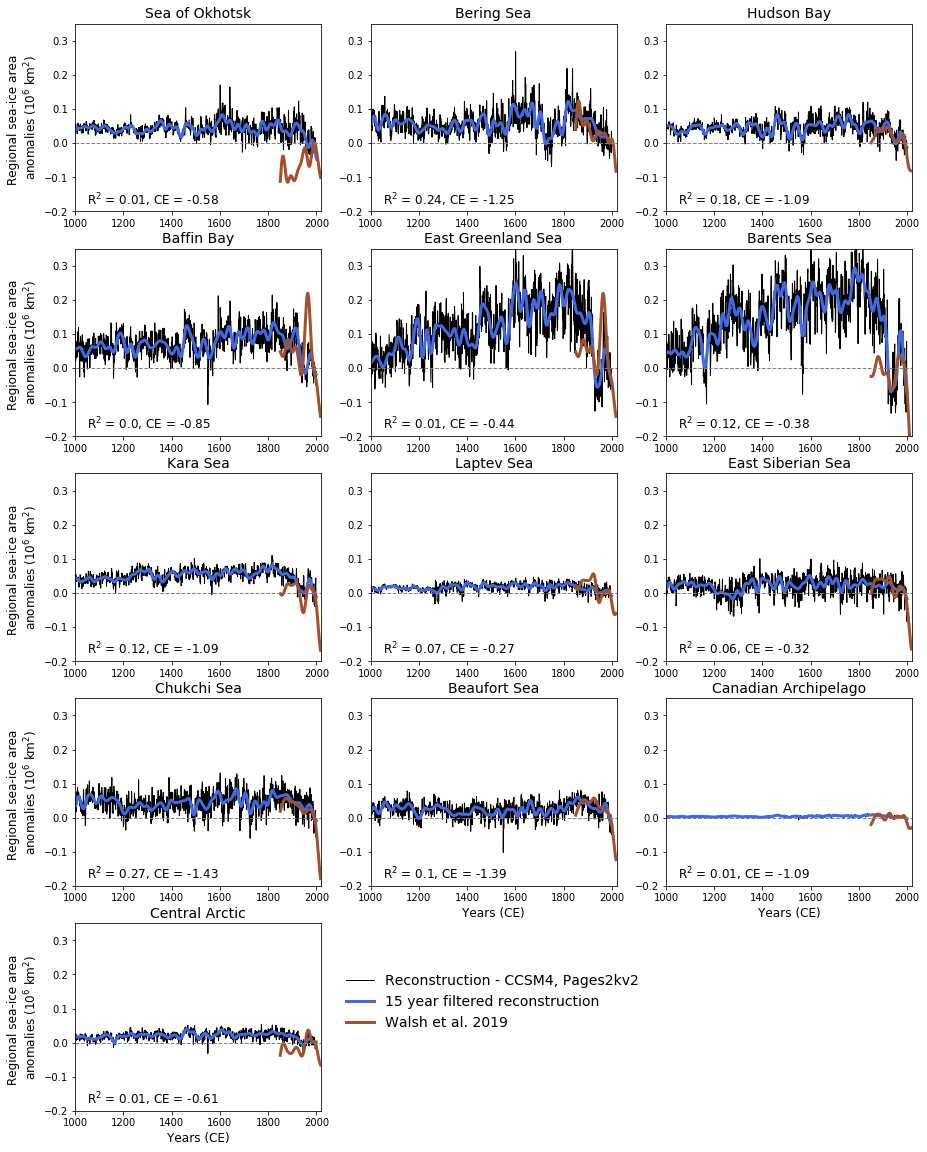

In [21]:
fig, ax = plt.subplots(5,3, figsize=(15,20))
ax[4,2].set_axis_off()
ax[4,1].set_axis_off()
ax = ax.flatten()


for i,reg in enumerate(regions_both): 
    walsh_filt15 =  signal.filtfilt(b2,a2,walsh_regional_sia[reg])
    recon_filt15 =  signal.filtfilt(b2,a2,regional_sia_allit_anom[reg]/100)
    
    ax[i].plot(np.array(recon_years),regional_sia_allit_anom[reg]/100, color='k', linewidth=1, 
               label='Reconstruction - CCSM4, Pages2kv2')
    ax[i].plot(np.array(recon_years), recon_filt15, color='royalblue', linewidth=3, 
              label = '15 year filtered reconstruction')
    
    ax[i].plot(walsh_years,walsh_filt15, color='sienna',linewidth=3, label = 'Walsh et al. 2019')
    
    ax[i].axhline(0,color='gray', linestyle='--', linewidth=1)
    if i in [0,3,6,9,12]:
        ax[i].set_ylabel('Regional sea-ice area \nanomalies (10$^6$ km$^2$)', fontsize=12)
        
    if i is 12: 
        ax[i].legend(bbox_to_anchor=[1.05,0.8], fontsize=14, frameon=False)
  
    ax[i].set_xlim(1000,2020)
    ax[i].set_ylim(-0.2,0.35)
    ax[i].set_title(reg, fontsize=14)
    ax[i].text(1050, -0.18,('R$^2$ = '+str(np.round(corr_walsh_ccsm4_allregions[reg]**2,2)) + 
               ', CE = '+str(np.round(ce_walsh_ccsm4_allregions[reg],2))), fontsize=12)
    
ax[12].set_xlabel('Years (CE)',fontsize=12)
ax[11].set_xlabel('Years (CE)',fontsize=12)
ax[10].set_xlabel('Years (CE)',fontsize=12)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'Regional_comparison_ccsm4_walsh_all_regions.png'
# plt.savefig(savedir+savename)

In [22]:
ce_sie_walsh_ccsm4_allregions = {}
corr_sie_walsh_ccsm4_allregions = {}

for reg in regions_both: 
    print('Working on '+reg+'...')
    [ce_sie_walsh_ccsm4_allregions[reg],
     corr_sie_walsh_ccsm4_allregions[reg],_,_] = rrutils.find_ce_corr(walsh_regional_sie[reg], 
                                                                  regional_sie_allit_anom[reg],
                                                                  np.array(recon_years),
                                                                  walsh_time,1850,1999)
    
    print('R^2 = '+str(np.round(corr_sie_walsh_ccsm4_allregions[reg]**2,2)))
    print('CE = '+str(np.round(ce_sie_walsh_ccsm4_allregions[reg],2))+'\n')

Working on Sea of Okhotsk...
R^2 = 0.0
CE = -0.24

Working on Bering Sea...
R^2 = 0.28
CE = -1.32

Working on Hudson Bay...
R^2 = 0.28
CE = -0.48

Working on Baffin Bay...
R^2 = 0.02
CE = -0.75

Working on East Greenland Sea...
R^2 = 0.04
CE = -0.49

Working on Barents Sea...
R^2 = 0.22
CE = -0.33

Working on Kara Sea...
R^2 = 0.27
CE = -1.14

Working on Laptev Sea...
R^2 = 0.16
CE = -0.35

Working on East Siberian Sea...
R^2 = 0.03
CE = -0.24

Working on Chukchi Sea...
R^2 = 0.43
CE = -1.52

Working on Beaufort Sea...
R^2 = 0.34
CE = -1.54

Working on Canadian Archipelago...
R^2 = 0.23
CE = -1.44

Working on Central Arctic...
R^2 = 0.12
CE = -0.52



/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


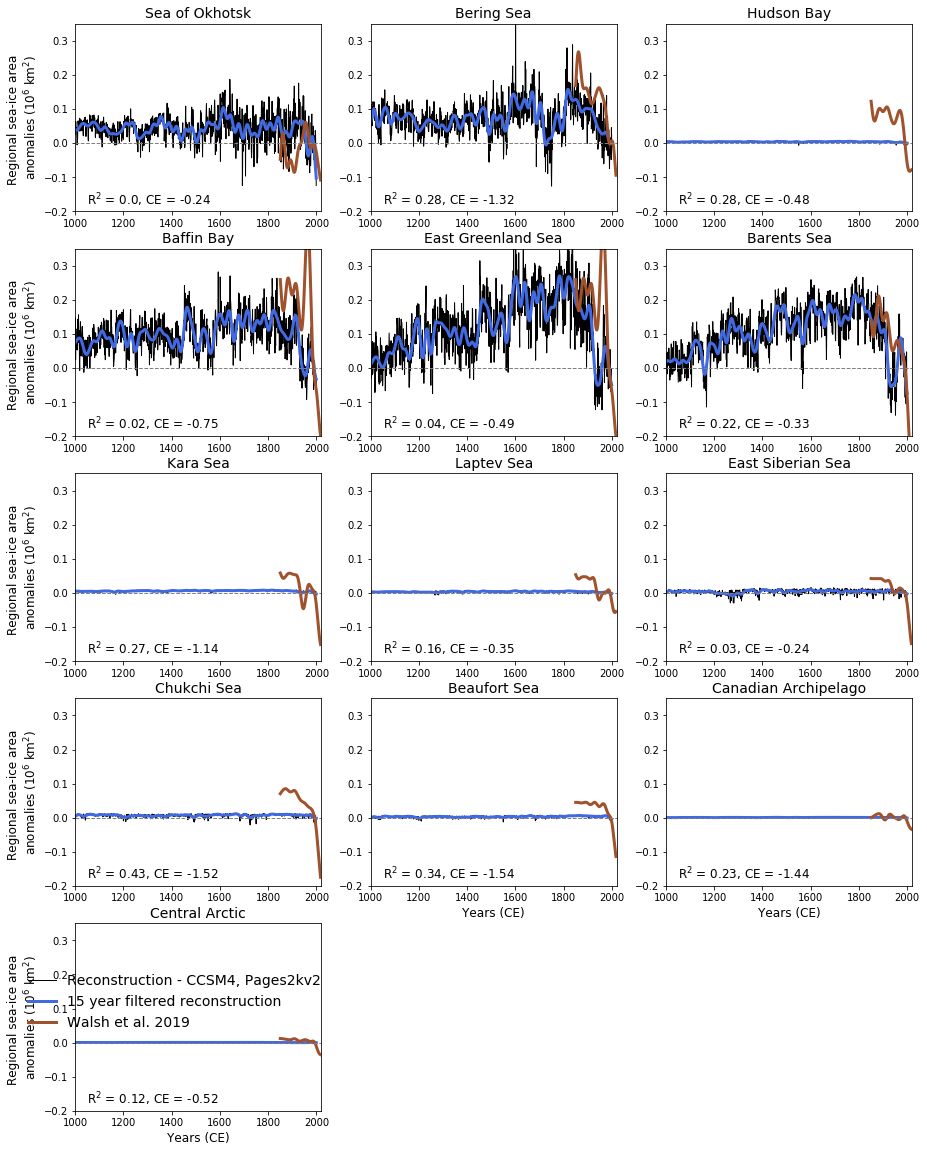

In [23]:
fig, ax = plt.subplots(5,3, figsize=(15,20))
ax[4,2].set_axis_off()
ax[4,1].set_axis_off()
ax = ax.flatten()


for i,reg in enumerate(regions_both): 
    walsh_filt15 =  signal.filtfilt(b2,a2,walsh_regional_sie[reg])
    recon_filt15 =  signal.filtfilt(b2,a2,regional_sie_allit_anom[reg]/100)
    
    ax[i].plot(np.array(recon_years),regional_sie_allit_anom[reg]/100, color='k', linewidth=1, 
               label='Reconstruction - CCSM4, Pages2kv2')
    ax[i].plot(np.array(recon_years), recon_filt15, color='royalblue', linewidth=3, 
              label = '15 year filtered reconstruction')
    
    ax[i].plot(walsh_years,walsh_filt15, color='sienna',linewidth=3, label = 'Walsh et al. 2019')
    
    ax[i].axhline(0,color='gray', linestyle='--', linewidth=1)
    if i in [0,3,6,9,12]:
        ax[i].set_ylabel('Regional sea-ice area \nanomalies (10$^6$ km$^2$)', fontsize=12)
        
    if i is 12: 
        ax[i].legend(bbox_to_anchor=[1.05,0.8], fontsize=14, frameon=False)
  
    ax[i].set_xlim(1000,2020)
    ax[i].set_ylim(-0.2,0.35)
    ax[i].set_title(reg, fontsize=14)
    ax[i].text(1050, -0.18,('R$^2$ = '+str(np.round(corr_sie_walsh_ccsm4_allregions[reg]**2,2)) + 
               ', CE = '+str(np.round(ce_sie_walsh_ccsm4_allregions[reg],2))), fontsize=12)
    
ax[12].set_xlabel('Years (CE)',fontsize=12)
ax[11].set_xlabel('Years (CE)',fontsize=12)
ax[10].set_xlabel('Years (CE)',fontsize=12)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'Regional_comparison_ccsm4_walsh_all_regions.png'
# plt.savefig(savedir+savename)

In [55]:
ce_walshs_allregions = {}
corr_walshs_allregions = {}

for reg in regions_both: 
    print('Working on '+reg+'...')
    [ce_walshs_allregions[reg],
     corr_walshs_allregions[reg],_,_] = rrutils.find_ce_corr(walsh_regional_sia[reg], 
                                                                  walsh_regional_sie[reg],
                                                                  walsh_time,
                                                                  walsh_time,1850,1999)
    
    print('R^2 = '+str(np.round(corr_walshs_allregions[reg]**2,2)))
    print('CE = '+str(np.round(ce_walshs_allregions[reg],2))+'\n')

Working on Sea of Okhotsk...
R^2 = 0.81
CE = 0.32

Working on Bering Sea...
R^2 = 0.78
CE = -0.66

Working on Hudson Bay...
R^2 = 0.6
CE = -0.72

Working on Baffin Bay...
R^2 = 0.8
CE = -0.55

Working on East Greenland Sea...
R^2 = 0.8
CE = -0.55

Working on Barents Sea...
R^2 = 0.46
CE = -0.94

Working on Kara Sea...
R^2 = 0.78
CE = 0.55

Working on Laptev Sea...
R^2 = 0.82
CE = 0.75

Working on East Siberian Sea...
R^2 = 0.82
CE = 0.71

Working on Chukchi Sea...
R^2 = 0.76
CE = 0.31

Working on Beaufort Sea...
R^2 = 0.72
CE = 0.52

Working on Canadian Archipelago...
R^2 = 0.59
CE = 0.06

Working on Central Arctic...
R^2 = 0.04
CE = -24.98



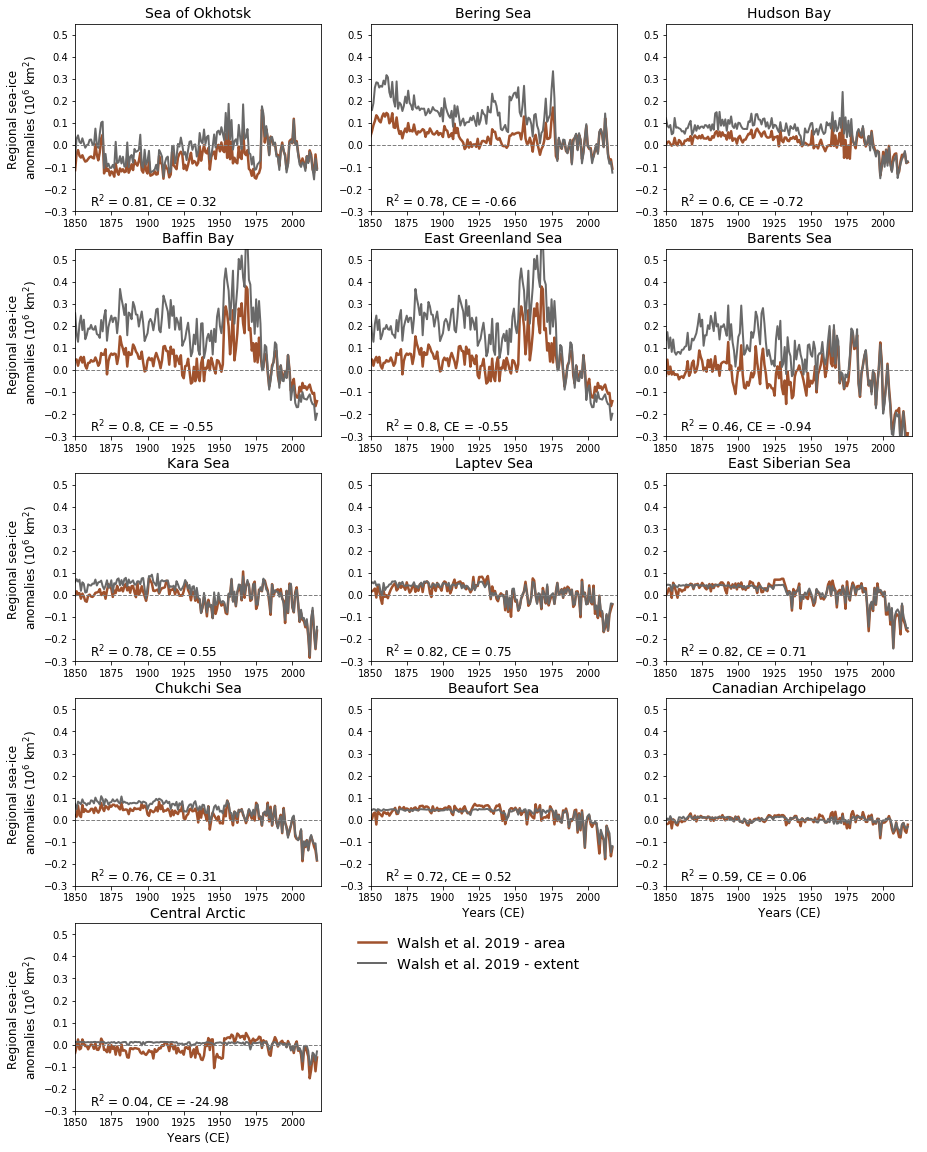

In [62]:
fig, ax = plt.subplots(5,3, figsize=(15,20))
ax[4,2].set_axis_off()
ax[4,1].set_axis_off()
ax = ax.flatten()


for i,reg in enumerate(regions_both): 
    ax[i].plot(walsh_years,walsh_regional_sia[reg], color='sienna',linewidth=2.5, 
               label = 'Walsh et al. 2019 - area')
    ax[i].plot(walsh_years,walsh_regional_sie[reg], color='dimgrey',linewidth=2, 
               label = 'Walsh et al. 2019 - extent')
    
    ax[i].axhline(0,color='gray', linestyle='--', linewidth=1)
    if i in [0,3,6,9,12]:
        ax[i].set_ylabel('Regional sea-ice \nanomalies (10$^6$ km$^2$)', fontsize=12)
        
#     if i is 12: 
#         ax[i].legend(bbox_to_anchor=[1.15,0.8], fontsize=14, frameon=False)
  
    ax[i].set_xlim(1850,2020)
    ax[i].set_ylim(-0.3,0.55)
    ax[i].set_title(reg, fontsize=14)
    ax[i].text(1860, -0.28,('R$^2$ = '+str(np.round(corr_walshs_allregions[reg]**2,2)) + 
               ', CE = '+str(np.round(ce_walshs_allregions[reg],2))), fontsize=12)
    
ax[12].set_xlabel('Years (CE)',fontsize=12)
ax[11].set_xlabel('Years (CE)',fontsize=12)
ax[10].set_xlabel('Years (CE)',fontsize=12)
ax[12].legend(bbox_to_anchor=[2.1,1], fontsize=14, frameon=False)

In [59]:
np.nanvar(walsh_regional_sie['Central Arctic']), np.nanvar(walsh_regional_sia['Central Arctic'])

(0.0002865444507703224, 0.0011657465282907387)